In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [13]:
risk_df = pd.read_csv('/Users/regi/Flatiron/mod4_project/cleaned_data/final_risk.csv')

In [14]:
risk_df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Strata_ID_Number,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured
0,1,1,Autauga,Alabama,AL,29,27.800,78.60,24.500000,29.1,26.600000,14.2,5690
1,1,3,Baldwin,Alabama,AL,16,27.200,76.20,23.600000,30.5,24.600000,7.2,19798
2,1,5,Barbour,Alabama,AL,51,29.795,80.08,25.600000,31.6,17.700000,6.6,5126
3,1,7,Bibb,Alabama,AL,42,29.795,86.60,26.897561,31.6,23.822917,13.1,3315
4,1,9,Blount,Alabama,AL,28,33.500,74.60,24.200000,31.6,23.600000,8.4,8131


## Base model

In [16]:
formula = "Diabetes ~ No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker"
model = ols(formula= formula, data=risk_df).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                     237.8
Date:                Tue, 26 Nov 2019   Prob (F-statistic):          1.57e-215
Time:                        17:56:56   Log-Likelihood:                -6905.5
No. Observations:                3114   AIC:                         1.382e+04
Df Residuals:                    3108   BIC:                         1.386e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.3227      0.755     -0.428      0.669      -1.802       1.157
No_Exercise         0.0807      0.009      8.649      0.000       0.062       0.099
Few_Fruit_Veg      -0.0108      0.010     -1.089      0.276      -0.030       0.009
Obesity             0.1668      0.012     14.166      0.000       0.144       0.190
High_Blood_Pres     0.1179      0.011     10.313      0.000       0.096       0.140
Smoker             -0.0124      0.009     -1.349      0.177      -0.030       0.006
==============================================================================
Omnibus:                      409.115   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1019.404
Skew:                           0.742   Prob(JB):                    4.36e-222
Kurtosis:                       5.378   Cond. No.                     1.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Check for multicollinearity

In [20]:
risk_df.columns

Index(['State_FIPS_Code', 'County_FIPS_Code', 'CHSI_County_Name',
       'CHSI_State_Name', 'CHSI_State_Abbr', 'Strata_ID_Number', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes',
       'Uninsured'],
      dtype='object')

In [22]:
ols_df = risk_df[['CHSI_County_Name',
        'CHSI_State_Abbr', 'No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker', 'Diabetes']]

In [23]:
ols_df


,CHSI_County_Name,CHSI_State_Abbr,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes
0,Autauga,AL,27.800,78.60,24.500000,29.1,26.600000,14.2
1,Baldwin,AL,27.200,76.20,23.600000,30.5,24.600000,7.2
2,Barbour,AL,29.795,80.08,25.600000,31.6,17.700000,6.6
3,Bibb,AL,29.795,86.60,26.897561,31.6,23.822917,13.1
4,Blount,AL,33.500,74.60,24.200000,31.6,23.600000,8.4
...,...,...,...,...,...,...,...,...
3109,Sweetwater,WY,21.900,80.70,23.600000,22.7,27.400000,5.3
3110,Teton,WY,9.600,68.80,9.000000,18.9,13.700000,2.4
3111,Uinta,WY,23.400,83.10,22.700000,22.5,21.600000,4.8
3112,Washakie,WY,23.200,78.10,21.100000,27.8,19.700000,9.4


In [24]:
ols_preds = ols_df[['No_Exercise',
       'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker']]

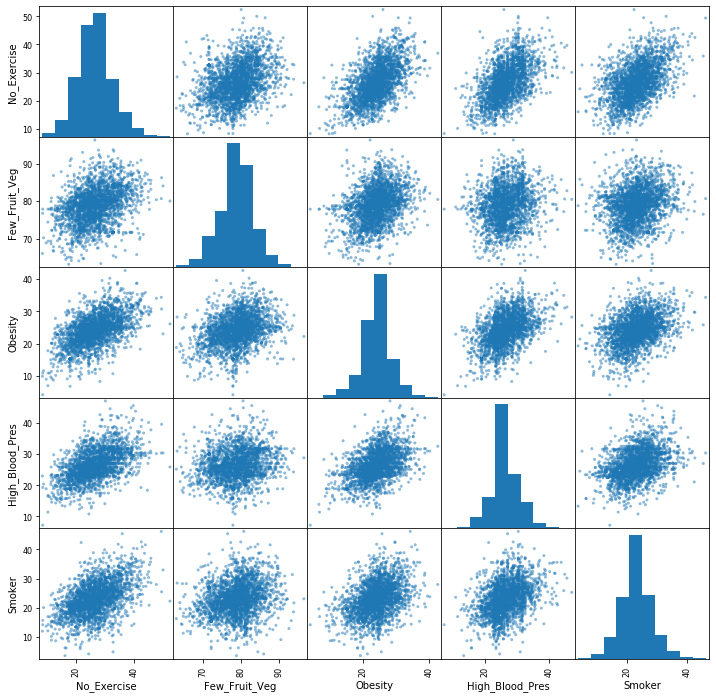

In [32]:
pd.plotting.scatter_matrix(ols_preds, figsize = [12,12])
plt.show()

In [37]:
ols_preds.corr() > .65

,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker
No_Exercise,True,False,False,False,False
Few_Fruit_Veg,False,True,False,False,False
Obesity,False,False,True,False,False
High_Blood_Pres,False,False,False,True,False
Smoker,False,False,False,False,True


### Looks like there is no collinearity we need to worry about 

## Scaling / Normalization / Standardization

Our 